### Reading In The Data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
# sns.set

In [98]:
pd.set_option('max_column', None)
data = pd.read_csv('Week1_challenge_data_source.csv')
df = data
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [99]:
# Reading in and printing out description of all columns in the dataset
field_desc = pd.read_excel('Field_Descriptions.xlsx')
count = 0
for i in field_desc['Fields']:
    print(f'{i}: {field_desc.Description[count]}\n')
    count += 1

bearer id: xDr session identifier

Dur. (ms): Total Duration of the xDR (in ms)

Start: Start time of the xDR (first frame timestamp)

Start ms: Milliseconds offset of start time for the xDR (first frame timestamp)

End: End time of the xDR (last frame timestamp)

End ms: Milliseconds offset of end time of the xDR (last frame timestamp)

Dur. (s): Total Duration of the xDR (in s)

IMSI: International Mobile Subscriber Identity

MSISDN/Number: MS International PSTN/ISDN Number of mobile - customer number

IMEI: International Mobile Equipment Identity

Last Location Name: User location call name (2G/3G/4G) at the end of the bearer

Avg RTT DL (ms): Average Round Trip Time measurement Downlink direction (msecond)

Avg RTT UL (ms): Average Round Trip Time measurement Uplink direction (msecond)

Avg Bearer TP DL (kbps): Average Bearer Throughput for Downlink (kbps) - based on BDR duration

Avg Bearer TP UL (kbps): Average Bearer Throughput for uplink (kbps) - based on BDR duration

TCP DL R

In [100]:
# Checking the shape of the dataset
data.shape

(150001, 55)

The dataset has 150001 rows and 55 columns

### Performing Pre-processing

In [101]:
# function to check all columns for percentage missing values
# And return list of columns with 30% or more of values missing
def missing_vals(df):
    count = 0
    drop = []
    for i in df.columns:
        print(f'The column "{i}" has {round(df.isnull().sum()[count]/df[i].shape[0] * 100, 2)}% of values missing.\n')
        if round(df.isnull().sum()[count]/df[i].shape[0] * 100, 2) >= 30:
            drop.append(i)
        count+=1
    return drop

In [102]:
# using the missing vals function and storing the list in a variable
drop = missing_vals(df)

The column "Bearer Id" has 0.66% of values missing.

The column "Start" has 0.0% of values missing.

The column "Start ms" has 0.0% of values missing.

The column "End" has 0.0% of values missing.

The column "End ms" has 0.0% of values missing.

The column "Dur. (ms)" has 0.0% of values missing.

The column "IMSI" has 0.38% of values missing.

The column "MSISDN/Number" has 0.71% of values missing.

The column "IMEI" has 0.38% of values missing.

The column "Last Location Name" has 0.77% of values missing.

The column "Avg RTT DL (ms)" has 18.55% of values missing.

The column "Avg RTT UL (ms)" has 18.54% of values missing.

The column "Avg Bearer TP DL (kbps)" has 0.0% of values missing.

The column "Avg Bearer TP UL (kbps)" has 0.0% of values missing.

The column "TCP DL Retrans. Vol (Bytes)" has 58.76% of values missing.

The column "TCP UL Retrans. Vol (Bytes)" has 64.43% of values missing.

The column "DL TP < 50 Kbps (%)" has 0.5% of values missing.

The column "50 Kbps < DL TP 

In [103]:
# checking columns that will be dropped
drop

['TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B']

In [104]:
# dropping columns with over 30% of data missing and checking shape
df.drop(drop, axis=1, inplace=True)
df.shape

(150001, 45)

In [105]:
# checking head of dataframe
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [107]:
# Function to determine outlier using interquartile range
def outlier_det(df, col):

    return (df.describe()[col][6] - df.describe()[col][4]) * 1.5 + df.describe()[col][6]


# Function to check specified columns for outliers and store row numbers
def outlier_dict(df):

    drop_rows = {}
    for i in df.columns:
        test = outlier_det(df, i)
        count = 0
        lst = []
        print(f'The numer of ouliers in the column {i} is:\n')
        for j in df[i]:
            if j >= test:
                lst.append(count)
                drop_rows[count] = count
                
            else: continue
            count +=1
        print(f'{len(lst)}\n')

    return drop_rows

In [108]:
# creating list of columns to check for outliers
cols = []
cols.extend(list(df.columns[12:14])) 
cols.extend(list(df.columns[27:]))
cols

['Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [109]:
# checking for outliers in selected columns and the number of rows with ouliers
outliers = outlier_dict(df[cols])

The numer of ouliers in the column Avg Bearer TP DL (kbps) is:

13234

The numer of ouliers in the column Avg Bearer TP UL (kbps) is:

21531

The numer of ouliers in the column Nb of sec with Vol DL < 6250B is:

24544

The numer of ouliers in the column Nb of sec with Vol UL < 1250B is:

25154

The numer of ouliers in the column Social Media DL (Bytes) is:

0

The numer of ouliers in the column Social Media UL (Bytes) is:

0

The numer of ouliers in the column Google DL (Bytes) is:

0

The numer of ouliers in the column Google UL (Bytes) is:

0

The numer of ouliers in the column Email DL (Bytes) is:

0

The numer of ouliers in the column Email UL (Bytes) is:

0

The numer of ouliers in the column Youtube DL (Bytes) is:

0

The numer of ouliers in the column Youtube UL (Bytes) is:

0

The numer of ouliers in the column Netflix DL (Bytes) is:

0

The numer of ouliers in the column Netflix UL (Bytes) is:

0

The numer of ouliers in the column Gaming DL (Bytes) is:

0

The numer of oulier

In [110]:
# dropping rows with outliers and checking shape
df.drop(list(outliers.keys()), axis=0, inplace=True)
df.shape

(124847, 45)

In [111]:
# function to forward fill missing column values then backward fill remaining missing values
def ffill_bfill_cols(df, col):
    df[col] = df[col].fillna(method='ffill')
    df[col] = df[col].fillna(method='bfill')


    return df[col]

# function to fill missing values using mode
def mode_fill(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])

    return df[col]

# function to convert column to datetime format
def datetime(df, col):
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
    
    return df[col]

# function to fill missing values based on column types
def fill_cols(df):
    for i in df.columns:
        if df.dtypes[i] == 'float64':
            df[i] = ffill_bfill_cols(df, i)
        elif df.dtypes[i] == 'O':
            df[i] = mode_fill(df, i)
        else: continue
    
    return df

In [112]:
# creating new dataframe with missing values filled
df_pp = fill_cols(df)

In [113]:
# checking to make sure there are no issing values anymore
df_pp.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [114]:
# changing start and end columns to datetime type
for i in ['Start','End']:
    
    df_pp[i] = datetime(df_pp, i)
    
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124847 entries, 25154 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       124847 non-null  float64       
 1   Start                           124847 non-null  datetime64[ns]
 2   Start ms                        124847 non-null  float64       
 3   End                             124847 non-null  datetime64[ns]
 4   End ms                          124847 non-null  float64       
 5   Dur. (ms)                       124847 non-null  float64       
 6   IMSI                            124847 non-null  float64       
 7   MSISDN/Number                   124847 non-null  float64       
 8   IMEI                            124847 non-null  float64       
 9   Last Location Name              124847 non-null  object        
 10  Avg RTT DL (ms)                 124847 non-null  flo

In [115]:
df_pp.reset_index(drop=True, inplace=True)

### Task 1. User Overview Analysis

### Pre-processing for task 1

In [119]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

# pd.options.display.float_format = format_float

In [120]:
lst = ['Bearer Id', 'MSISDN/Number', 'Dur. (ms)']
lst2 = []

n_df = pd.DataFrame()

for i in lst:
    n_df[i]= df_pp[i]

for i in df_pp.columns[-16:]:
    lst2.append(re.sub('Bytes', 'MegaBytes', i))

count = -17
for i in lst2:
    n_df[i] = df_pp[df_pp.columns[count]]
    count +=1
    
for i in n_df.columns[3:]:
    n_df[i]= convert_bytes_to_megabytes(n_df, i)

n_df

,Bearer Id,MSISDN/Number,Dur. (ms),Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,7.349883e+18,3.361149e+10,526592.0,0.000415,2.294627,0.019030,6.456091,0.506961,2.513243,0.393681,4.563621,14.169882,17.059017,10.885928,398.294168,6.422467,233.785994,0.186202,32.584151
1,7.349883e+18,3.376260e+10,513490.0,0.000262,0.761984,0.007770,5.759002,3.702192,2.047662,0.480276,2.761297,15.589991,12.044624,15.493345,163.223398,6.214870,335.052892,1.188547,42.676991
2,1.311448e+19,3.365257e+10,523596.0,0.000214,3.144024,0.041564,1.351689,4.018918,0.044235,0.632796,22.993505,6.144069,3.310607,2.003133,263.171478,11.657292,813.933231,2.115386,26.613158
3,7.349883e+18,3.376260e+10,536118.0,0.000352,3.267043,0.034163,3.426480,2.772129,1.739103,0.752120,9.977575,8.673359,23.100171,18.593023,330.470354,15.340630,487.881365,6.392403,52.557827
4,1.311448e+19,3.366169e+10,550527.0,0.000458,0.000795,0.055232,5.391977,2.197776,3.345863,0.074124,15.306858,3.049582,4.361071,21.274681,509.981063,10.223865,382.268762,10.259263,47.134523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124842,7.277826e+18,3.365069e+10,81230.0,0.000229,3.464974,0.052091,9.967603,2.817311,0.057639,0.633237,16.191667,11.763428,17.883703,19.678161,526.609673,9.197207,3.264510,13.487416,57.628851
124843,7.349883e+18,3.366345e+10,97970.0,0.000102,2.344568,0.007613,2.229420,2.185941,1.954414,0.167304,13.877234,8.288284,19.350146,21.293148,626.893062,4.735033,712.180387,2.457758,39.135081
124844,1.311448e+19,3.362189e+10,98249.0,0.000108,1.245845,0.014394,3.850890,2.734579,1.525734,0.532543,22.660510,1.855903,9.963942,5.065760,553.539484,13.394316,121.100856,11.314729,34.912224
124845,1.311448e+19,3.361962e+10,97910.0,0.000082,0.801547,0.021562,4.189773,3.567494,2.228270,0.622644,8.817106,8.305402,3.322253,13.172589,352.536971,2.529475,814.713113,1.406930,29.626096


In [121]:
n_df['Social Total (MegaByte)'] = n_df.iloc[:, 2] + n_df.iloc[:, 3]
n_df['Google Total (MegaByte)'] = n_df.iloc[:, 4] + n_df.iloc[:, 5]
n_df['Email Total (MegaByte)'] = n_df.iloc[:, 6] + n_df.iloc[:, 7]
n_df['Youtube Total (MegaByte)'] = n_df.iloc[:, 8] + n_df.iloc[:, 9]
n_df['Netflix Total (MegaByte)'] = n_df.iloc[:, 10] + n_df.iloc[:, 11]
n_df['Gaming Total (MegaByte)'] = n_df.iloc[:, 12] + n_df.iloc[:, 13]
n_df['Other Total (MegaByte)'] = n_df.iloc[:, 14] + n_df.iloc[:, 15]
n_df['Total Data (MegaByte)'] = n_df.iloc[:, 16] + n_df.iloc[:, 17]
n_df

,Bearer Id,MSISDN/Number,Dur. (ms),Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),Social Total (MegaByte),Google Total (MegaByte),Email Total (MegaByte),Youtube Total (MegaByte),Netflix Total (MegaByte),Gaming Total (MegaByte),Other Total (MegaByte),Total Data (MegaByte)
0,7.349883e+18,3.361149e+10,526592.0,0.000415,2.294627,0.019030,6.456091,0.506961,2.513243,0.393681,4.563621,14.169882,17.059017,10.885928,398.294168,6.422467,233.785994,0.186202,32.584151,526592.000415,2.313657,6.963052,2.906924,18.733503,27.944945,404.716635,233.972196
1,7.349883e+18,3.376260e+10,513490.0,0.000262,0.761984,0.007770,5.759002,3.702192,2.047662,0.480276,2.761297,15.589991,12.044624,15.493345,163.223398,6.214870,335.052892,1.188547,42.676991,513490.000262,0.769754,9.461194,2.527938,18.351288,27.537969,169.438268,336.241439
2,1.311448e+19,3.365257e+10,523596.0,0.000214,3.144024,0.041564,1.351689,4.018918,0.044235,0.632796,22.993505,6.144069,3.310607,2.003133,263.171478,11.657292,813.933231,2.115386,26.613158,523596.000214,3.185588,5.370607,0.677031,29.137574,5.313740,274.828770,816.048617
3,7.349883e+18,3.376260e+10,536118.0,0.000352,3.267043,0.034163,3.426480,2.772129,1.739103,0.752120,9.977575,8.673359,23.100171,18.593023,330.470354,15.340630,487.881365,6.392403,52.557827,536118.000352,3.301206,6.198609,2.491223,18.650934,41.693194,345.810984,494.273768
4,1.311448e+19,3.366169e+10,550527.0,0.000458,0.000795,0.055232,5.391977,2.197776,3.345863,0.074124,15.306858,3.049582,4.361071,21.274681,509.981063,10.223865,382.268762,10.259263,47.134523,550527.000458,0.056027,7.589753,3.419987,18.356440,25.635752,520.204928,392.528025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124842,7.277826e+18,3.365069e+10,81230.0,0.000229,3.464974,0.052091,9.967603,2.817311,0.057639,0.633237,16.191667,11.763428,17.883703,19.678161,526.609673,9.197207,3.264510,13.487416,57.628851,81230.000229,3.517065,12.784914,0.690876,27.955095,37.561864,535.806880,16.751926
124843,7.349883e+18,3.366345e+10,97970.0,0.000102,2.344568,0.007613,2.229420,2.185941,1.954414,0.167304,13.877234,8.288284,19.350146,21.293148,626.893062,4.735033,712.180387,2.457758,39.135081,97970.000102,2.352181,4.415361,2.121718,22.165518,40.643294,631.628095,714.638145
124844,1.311448e+19,3.362189e+10,98249.0,0.000108,1.245845,0.014394,3.850890,2.734579,1.525734,0.532543,22.660510,1.855903,9.963942,5.065760,553.539484,13.394316,121.100856,11.314729,34.912224,98249.000108,1.260239,6.585469,2.058277,24.516413,15.029702,566.933800,132.415585
124845,1.311448e+19,3.361962e+10,97910.0,0.000082,0.801547,0.021562,4.189773,3.567494,2.228270,0.622644,8.817106,8.305402,3.322253,13.172589,352.536971,2.529475,814.713113,1.406930,29.626096,97910.000082,0.823109,7.757267,2.850914,17.122508,16.494842,355.066446,816.120043


In [63]:
# final_df = n_df[['Bearer Id', 'MSISDN/Number', 'Dur. (ms)','social total', 'google total', 'email total',\
#                  'youtube total', 'netflix total', 'gaming total', 'other total']]
# final_df.head()

### Sub Task

In [64]:
# checking the values in Handset Type column
df_pp['Handset Type'].value_counts()

Huawei B528S-23A                          17965
Apple iPhone 6S (A1688)                    7906
Apple iPhone 6 (A1586)                     7115
Apple iPhone 7 (A1778)                     4827
Apple iPhone Se (A1723)                    4265
                                          ...  
Shenzhen Jeko Co. Blackview Bv5800 Pro        1
Itel Technology. S33                          1
Huawei U8815                                  1
Meizu Technology. Pro 6S                      1
Xiaomi Communica. Mi Max2                     1
Name: Handset Type, Length: 1146, dtype: int64

In [65]:
# dropping all rows with undefined in Handset Type
df_pp.drop(df_pp[df_pp['Handset Type'] == 'undefined'].index, axis=0, inplace = True)

In [66]:
# checking shape of dataframe
df_pp.shape

(116958, 46)

#### Identifying top 10 handsets used by the customers

In [67]:
top_handsets = df_pp.groupby('Handset Type').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)[:10]
top_handsets

,MSISDN/Number
Handset Type,
Huawei B528S-23A,17965
Apple iPhone 6S (A1688),7906
Apple iPhone 6 (A1586),7115
Apple iPhone 7 (A1778),4827
Apple iPhone Se (A1723),4265
Apple iPhone 8 (A1905),4079
Apple iPhone Xr (A2105),3978
Samsung Galaxy S8 (Sm-G950F),3973
Samsung Galaxy J5 (Sm-J530),3418


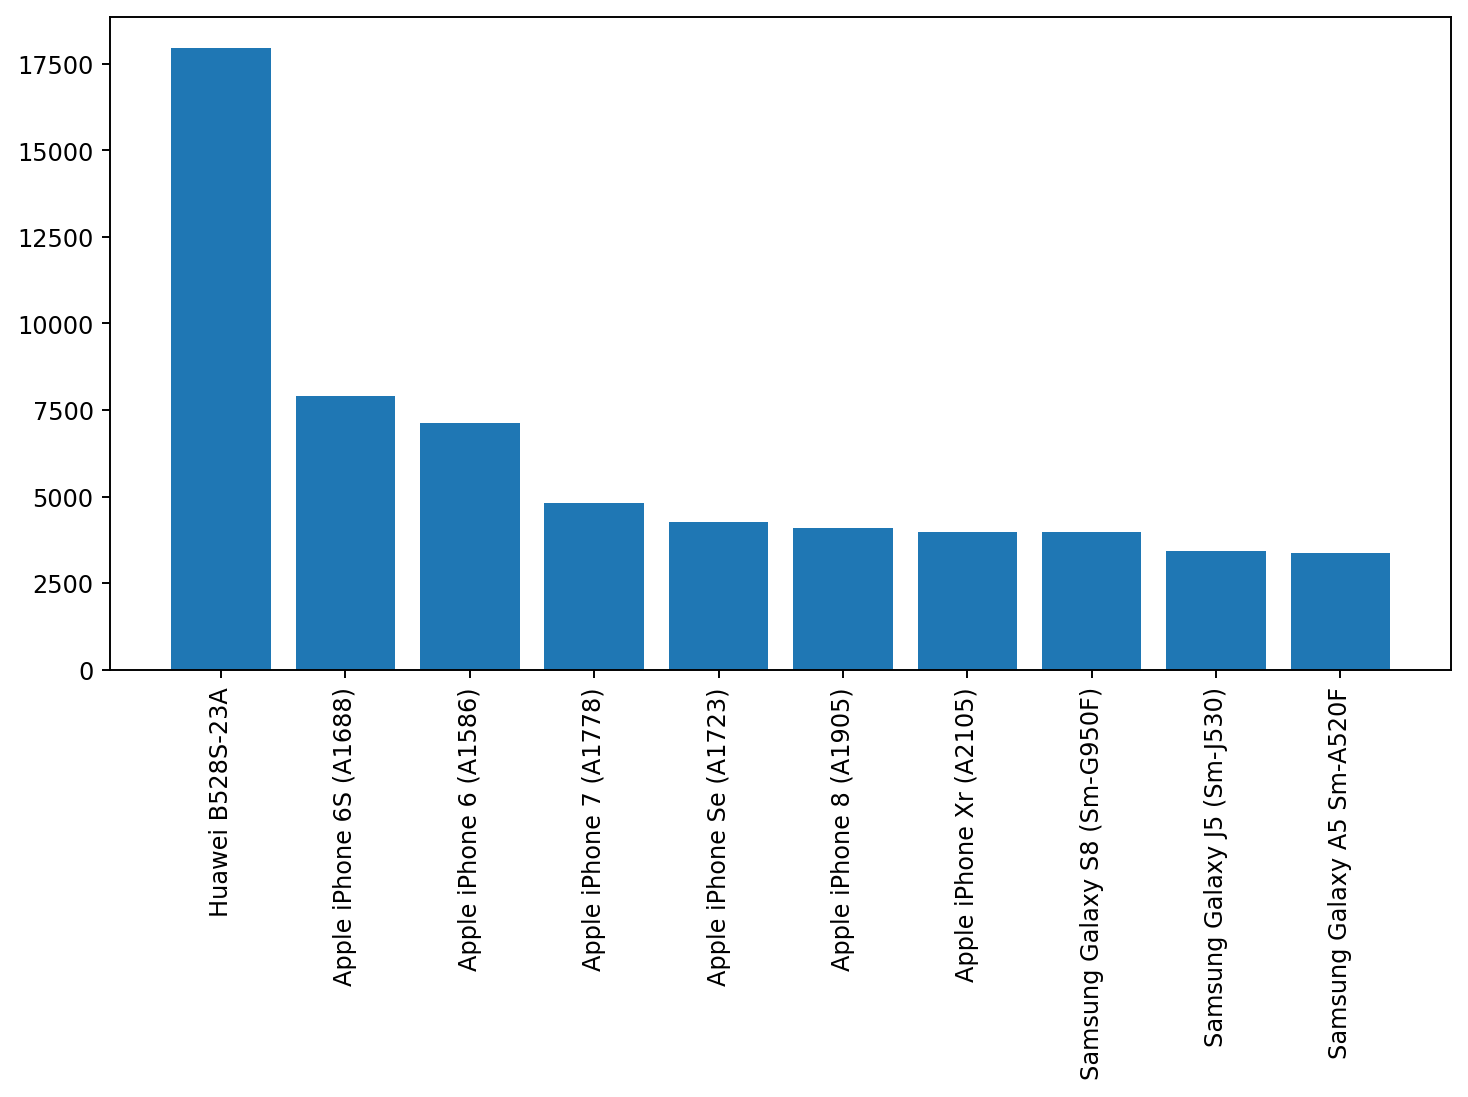

In [68]:
# Plot of top 10 handsets
plt.figure(figsize = (10,5), dpi = 173)

plt.bar(top_handsets.index, top_handsets['MSISDN/Number'])

plt.xticks(rotation=90)

plt.show()

#### Identifying The Top 3 Handset Manufacturer

In [69]:
# checking top 3 handset manufacturers
top_manufacturers = df_pp.groupby('Handset Manufacturer').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)[:3]
top_manufacturers

,MSISDN/Number
Handset Manufacturer,
Apple,48435
Samsung,35266
Huawei,29802


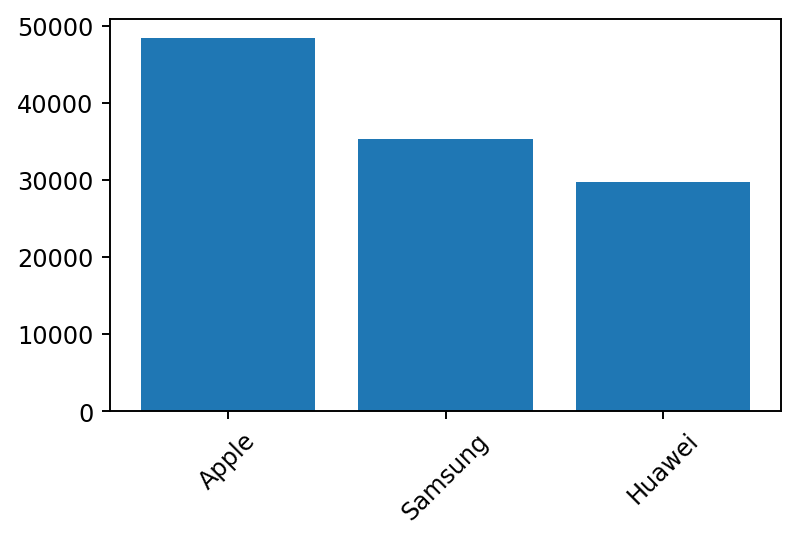

In [70]:
# Plot of top 3 handset manufacturers
plt.figure(figsize = (5,3), dpi = 173)

plt.bar(top_manufacturers.index, top_manufacturers['MSISDN/Number'])

plt.xticks(rotation=45)

plt.show()

#### identifing the top 5 handsets per top 3 handset manufacturer

In [71]:
# top3 = df_pp.loc[(df_pp['Handset Manufacturer'] == 'Apple') | df['Handset Manufacturer'] == 'Samsung' | df['Handset Manufacturer'] == 'Huawei']
top3 = df_pp.loc[df['Handset Manufacturer'].str.contains('Apple|Samsung|Huawei', flags=re.I, regex=True)]
top3 = top3[['Handset Type', 'Handset Manufacturer']]
top3.reset_index(drop=True, inplace=True)
top3.head()

,Handset Type,Handset Manufacturer
0,Samsung Galaxy J5 (Sm-J530),Samsung
1,Apple iPhone 6S (A1688),Apple
2,Samsung Galaxy J5 (Sm-J530),Samsung
3,Samsung Galaxy J3 (Sm-J330),Samsung
4,Huawei P10,Huawei


In [72]:
# cecking the top 5 per samsung
samsung = top3.loc[top3['Handset Manufacturer'] == 'Samsung']
top_samsung = samsung.groupby('Handset Type').agg({'Handset Manufacturer': 'count'}).sort_values(by='Handset Manufacturer', ascending=False)[:5]
top_samsung

,Handset Manufacturer
Handset Type,
Samsung Galaxy S8 (Sm-G950F),3973
Samsung Galaxy J5 (Sm-J530),3418
Samsung Galaxy A5 Sm-A520F,3362
Samsung Galaxy J3 (Sm-J330),3168
Samsung Galaxy S7 (Sm-G930X),2782


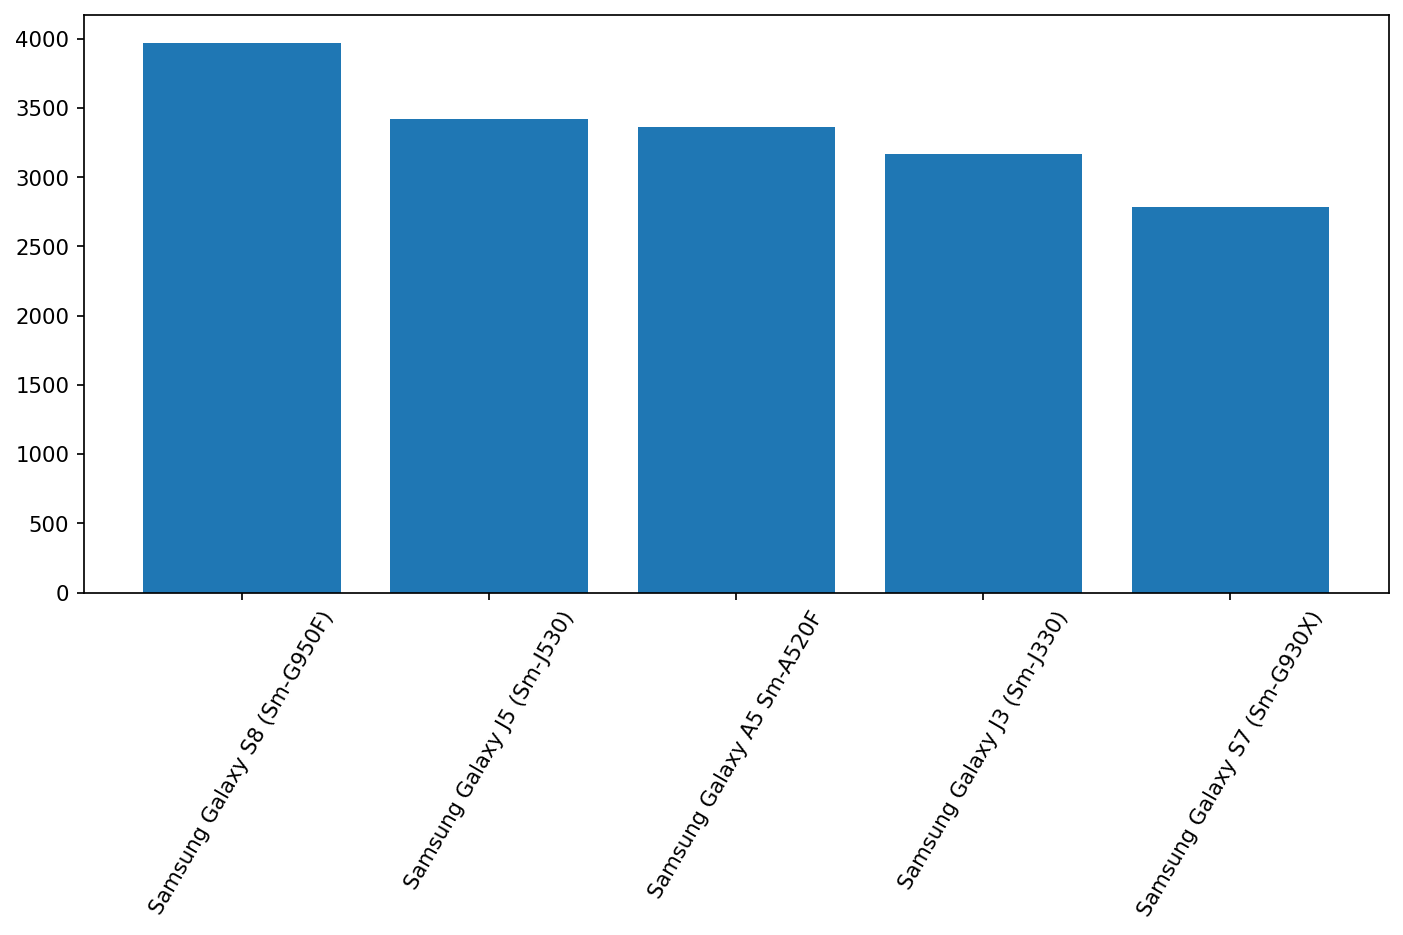

In [73]:
plt.figure(figsize = (11,5), dpi = 153)

plt.bar(top_samsung.index, top_samsung['Handset Manufacturer'])

plt.xticks(rotation=60)

plt.show()

In [74]:
# cecking the top 5 per Apple
apple = top3.loc[top3['Handset Manufacturer'] == 'Apple']
top_apple = apple.groupby('Handset Type').agg({'Handset Manufacturer': 'count'}).sort_values(by='Handset Manufacturer', ascending=False)[:5]
top_apple

,Handset Manufacturer
Handset Type,
Apple iPhone 6S (A1688),7906
Apple iPhone 6 (A1586),7115
Apple iPhone 7 (A1778),4827
Apple iPhone Se (A1723),4265
Apple iPhone 8 (A1905),4079


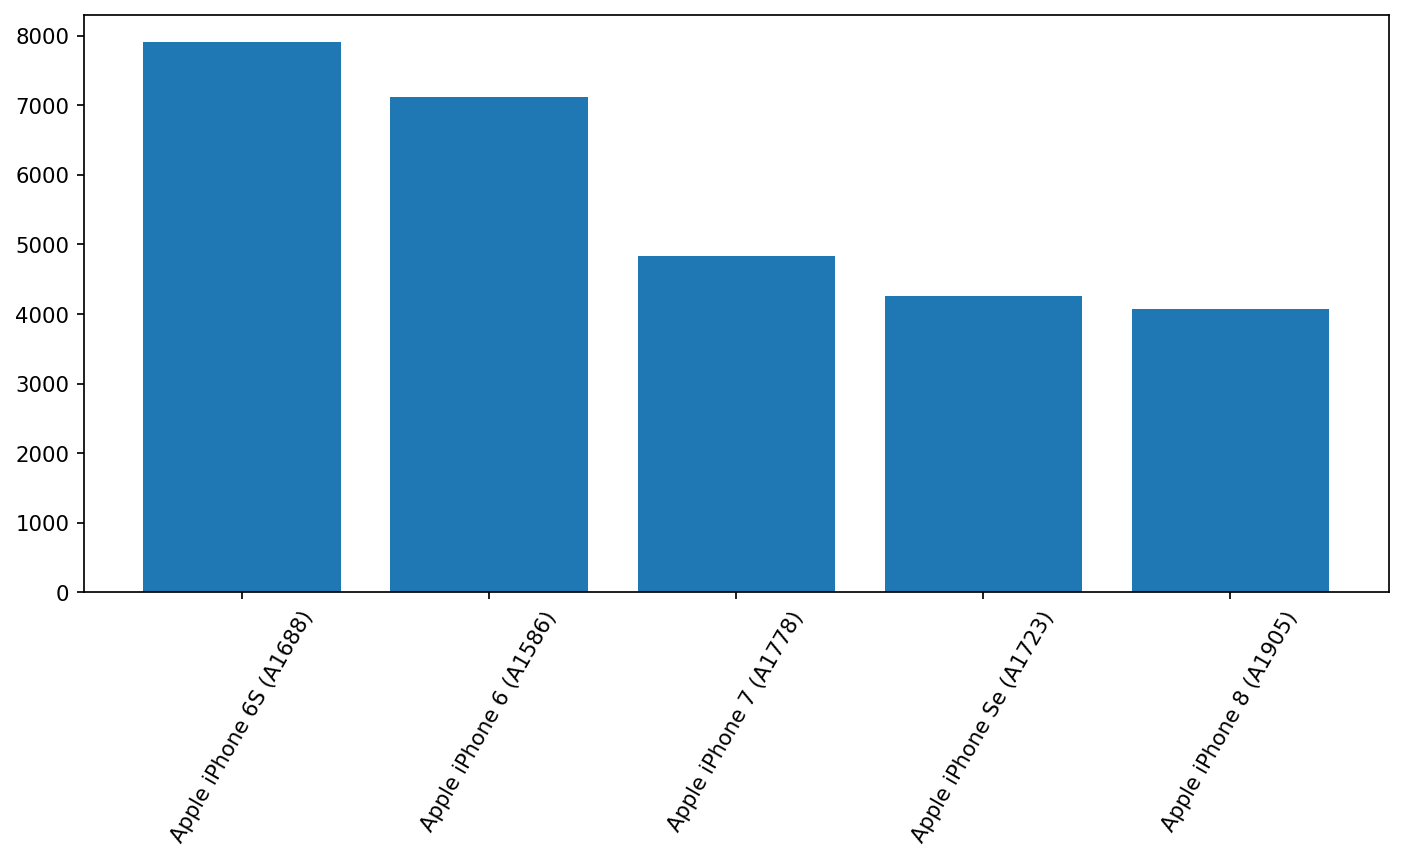

In [75]:
plt.figure(figsize = (11,5), dpi = 153)

plt.bar(top_apple.index, top_apple['Handset Manufacturer'])

plt.xticks(rotation=60)

plt.show()

In [76]:
# cecking the top 5 per Huawei
huawei = top3.loc[top3['Handset Manufacturer'] == 'Huawei']
top_huawei = huawei.groupby('Handset Type').agg({'Handset Manufacturer': 'count'}).sort_values(by='Handset Manufacturer', ascending=False)[:5]
top_huawei

,Handset Manufacturer
Handset Type,
Huawei B528S-23A,17596
Huawei E5180,1859
Huawei P20 Lite Huawei Nova 3E,1783
Huawei P20,1298
Huawei Y6 2018,874


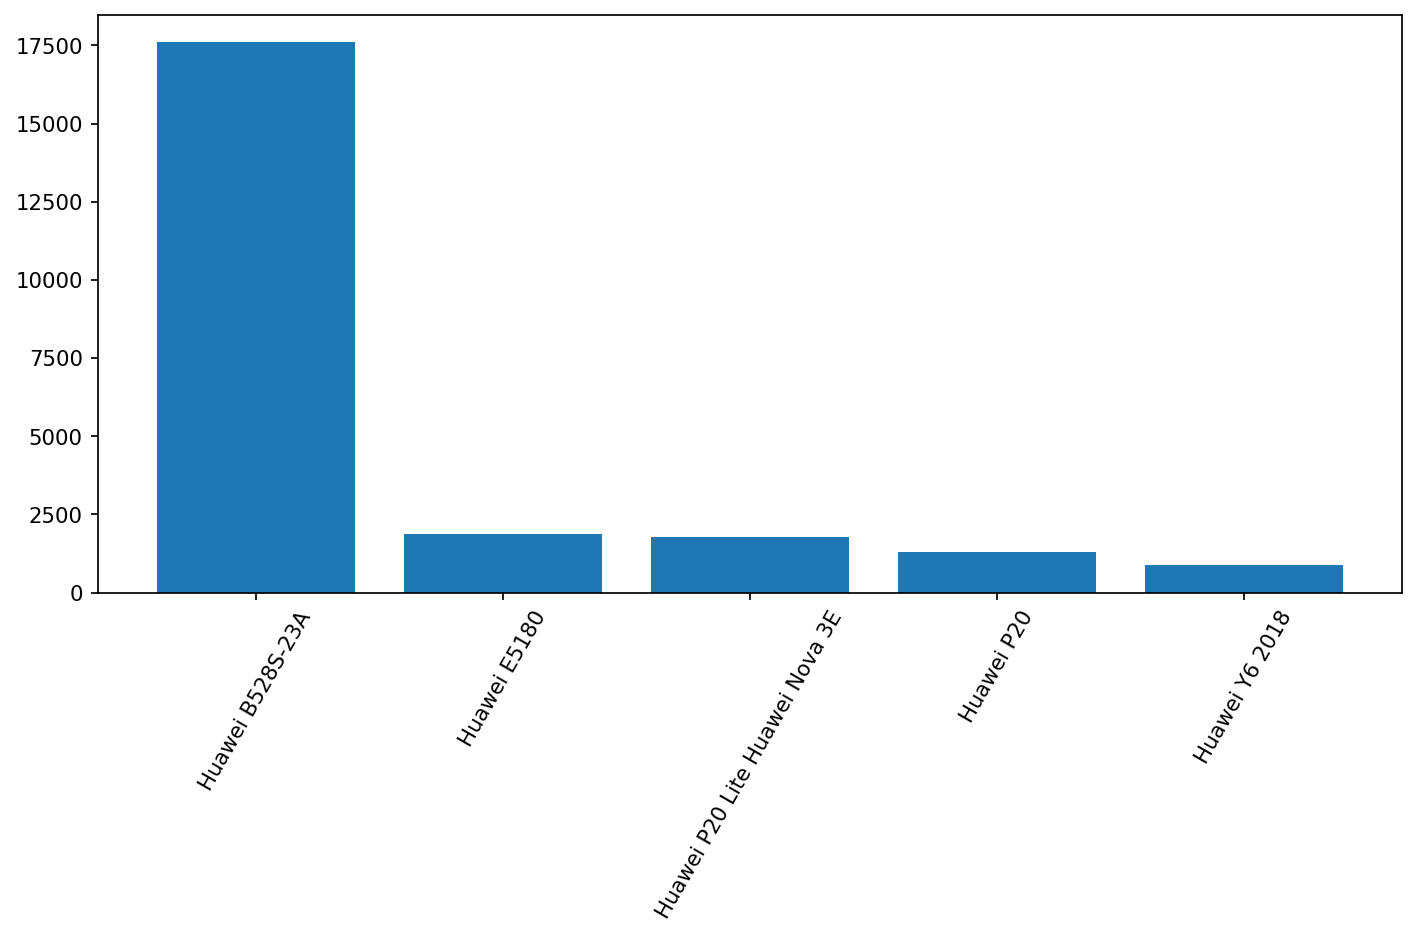

In [77]:
plt.figure(figsize = (11,5), dpi = 153)

plt.bar(top_huawei.index, top_huawei['Handset Manufacturer'])

plt.xticks(rotation=60)

plt.show()

### Interpretation & Recommendation

From the analysis above:
The *Huawei B528S-23A* has the highest users at 17596, and other Huawei phones have less than 2000 users.
Many Apple phones have a lot of users, with the top 2 having over 7000 users and the top 5 having over 4000 users.
Samsung phone users are evenly distributed with the top 4 having over 3000 users.

Therefore, users of the *Huawei B528S-23A, high end iphones and samsung users generally*  should be targeted more,

### Task 1.1
#### Aggregating per user on columns

In [78]:
# for number of xDR sessions 
n_df.groupby('MSISDN/Number')[['Bearer Id']].count().sort_values(by='Bearer Id', ascending=False)

,Bearer Id
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.365973e+10,16
3.366716e+10,13
3.367588e+10,12
...,...
3.366070e+10,1
3.366071e+10,1
3.366071e+10,1


In [79]:
# for session Duration 
n_df.groupby('MSISDN/Number')[['Dur. (ms)']].sum().sort_values(by='Dur. (ms)', ascending=False)

,Dur. (ms)
MSISDN/Number,
3.362578e+10,18.553754
3.362632e+10,8.791927
3.366716e+10,8.744914
3.360313e+10,6.287761
3.366284e+10,5.659733
...,...
3.366708e+10,0.020468
3.366032e+10,0.020403
3.363156e+10,0.020367


In [122]:
# for total DL and UL data
n_df.groupby('MSISDN/Number')[['Total UL (MegaBytes)', 'Total DL (MegaBytes)']].sum().sort_values(by=\
                                                                                                  ['Total UL (MegaBytes)', 'Total DL (MegaBytes)'], ascending=False)

,Total UL (MegaBytes),Total DL (MegaBytes)
MSISDN/Number,,
3.362578e+10,152.930478,729.577380
3.362632e+10,142.400945,669.650721
3.365973e+10,134.864910,624.260321
3.376041e+10,113.141379,521.518890
3.366471e+10,108.323400,471.244453
...,...,...
3.367241e+10,0.000758,29.583834
3.365931e+10,0.000690,49.740692
3.366146e+10,0.000442,40.535385


In [129]:
for i in n_df.columns[-8:-1]:
    print(f"{n_df.groupby('MSISDN/Number')[[i]].sum().sort_values(by=i, ascending=False).head()}\n")

               Social Total (MegaByte)
MSISDN/Number                         
3.362578e+10              1.855375e+07
3.362632e+10              8.791927e+06
3.366716e+10              8.744914e+06
3.366469e+10              6.288730e+06
3.360313e+10              6.287761e+06

               Google Total (MegaByte)
MSISDN/Number                         
3.362632e+10                 43.374779
3.365973e+10                 35.412358
3.362578e+10                 27.135500
3.366716e+10                 24.247850
3.378632e+10                 23.974919

               Email Total (MegaByte)
MSISDN/Number                        
3.362632e+10               152.191852
3.362578e+10               142.307915
3.365973e+10               116.516345
3.378632e+10               110.254484
3.366716e+10               105.032696

               Youtube Total (MegaByte)
MSISDN/Number                          
3.362632e+10                  42.418782
3.362578e+10                  40.633966
3.378632e+10             

### Task 1.2

In [29]:
for i in n_df.columns[1:]:
    print(n_df[i].describe())
    print('\n')
    

count    124847.000000
mean          0.116906
std           0.077270
min           0.019945
25%           0.085603
50%           0.088621
75%           0.144673
max           1.859336
Name: Dur. (ms), dtype: float64


count    124847.000000
mean          1.794540
std           1.036334
min           0.000028
25%           0.896530
50%           1.792937
75%           2.695520
max           3.586064
Name: Social Media DL (Bytes), dtype: float64


count    124847.000000
mean          0.032897
std           0.019006
min           0.000000
25%           0.016405
50%           0.032874
75%           0.049293
max           0.065870
Name: Social Media UL (Bytes), dtype: float64


count    124847.000000
mean          5.745934
std           3.308144
min           0.000207
25%           2.878547
50%           5.754657
75%           8.619743
max          11.462832
Name: Google DL (Bytes), dtype: float64


count    124847.000000
mean          2.057675
std           1.190243
min           0.000015


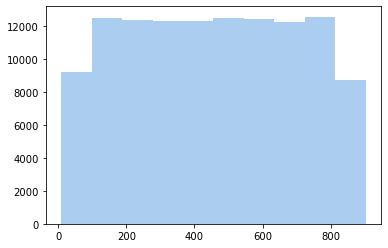

In [41]:
plt.hist(n_df['Total DL (Bytes)'], color='#abcdef')
plt.show()

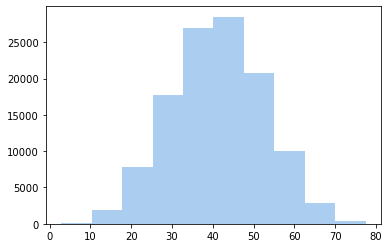

In [42]:
plt.hist(n_df['Total UL (Bytes)'], color='#abcdef')
plt.show()

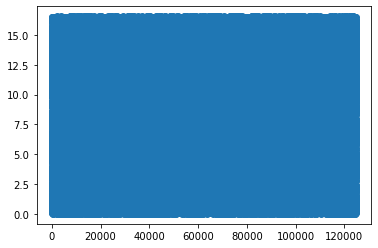

In [53]:
plt.scatter(n_df.index, n_df['Other UL (Bytes)'])
plt.show()

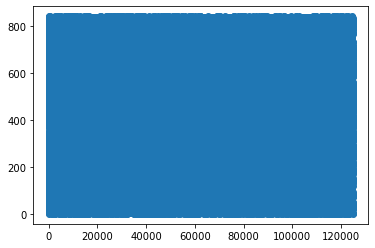

In [54]:
plt.scatter(n_df.index, n_df['Other DL (Bytes)'])
plt.show()

<AxesSubplot:ylabel='Gaming UL (Bytes)'>

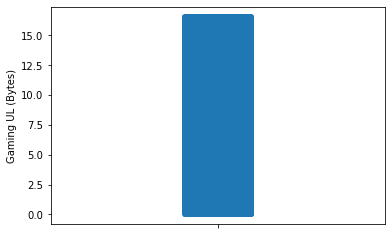

In [57]:
sns.stripplot(y=n_df['Gaming UL (Bytes)'])

<AxesSubplot:ylabel='Gaming DL (Bytes)'>

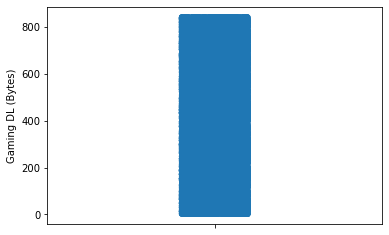

In [58]:
sns.stripplot(y=n_df['Gaming DL (Bytes)'])

<AxesSubplot:xlabel='Netflix UL (Bytes)', ylabel='Density'>

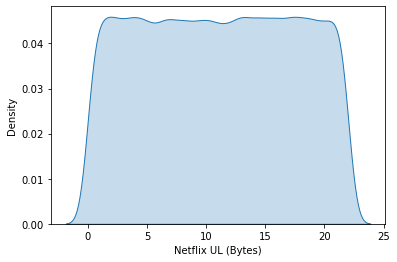

In [61]:
sns.kdeplot(x=n_df['Netflix UL (Bytes)'], shade=True)

<AxesSubplot:xlabel='Netflix DL (Bytes)', ylabel='Density'>

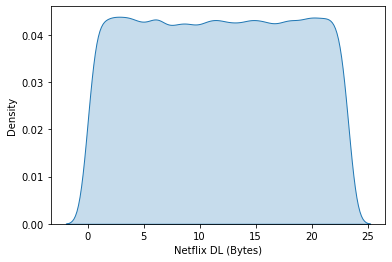

In [62]:
sns.kdeplot(x=n_df['Netflix DL (Bytes)'], shade=True)

<AxesSubplot:xlabel='Youtube UL (Bytes)', ylabel='Density'>

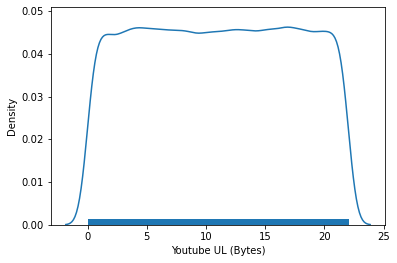

In [65]:
sns.distplot(n_df['Youtube UL (Bytes)'], rug=True, hist=False)

<AxesSubplot:xlabel='Youtube DL (Bytes)', ylabel='Density'>

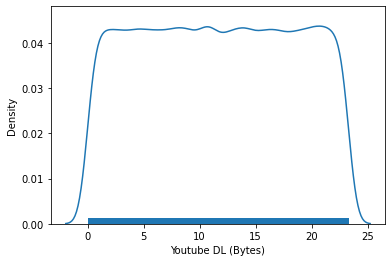

In [66]:
sns.distplot(n_df['Youtube DL (Bytes)'], rug=True, hist=False)

<AxesSubplot:xlabel='Email UL (Bytes)', ylabel='Density'>

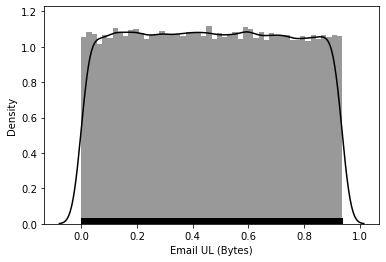

In [67]:
sns.distplot(n_df['Email UL (Bytes)'], rug=True, color='black')

<AxesSubplot:xlabel='Email DL (Bytes)', ylabel='Density'>

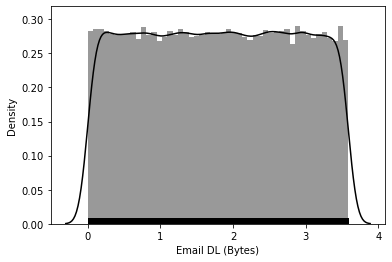

In [68]:
sns.distplot(n_df['Email DL (Bytes)'], rug=True, color='black')

<AxesSubplot:xlabel='Google UL (Bytes)'>

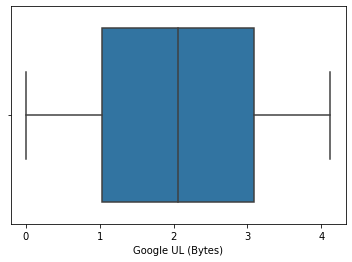

In [71]:
sns.boxplot(n_df['Google UL (Bytes)'])

<AxesSubplot:xlabel='Google DL (Bytes)'>

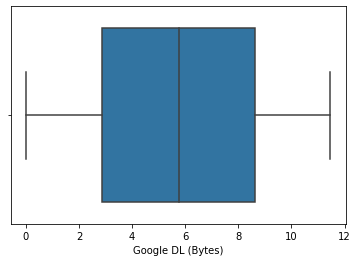

In [72]:
sns.boxplot(n_df['Google DL (Bytes)'])

<AxesSubplot:xlabel='Social Media UL (Bytes)'>

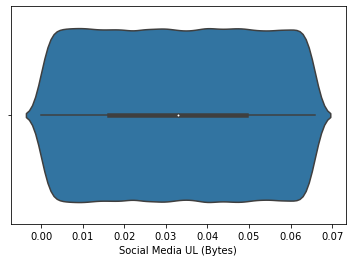

In [73]:
sns.violinplot(n_df['Social Media UL (Bytes)'], orient='vertical')

<AxesSubplot:xlabel='Social Media DL (Bytes)'>

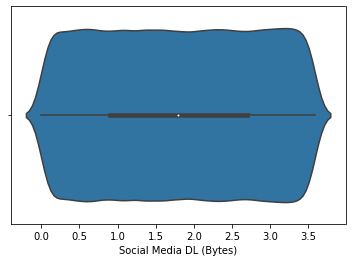

In [74]:
sns.violinplot(n_df['Social Media DL (Bytes)'], orient='vertical')

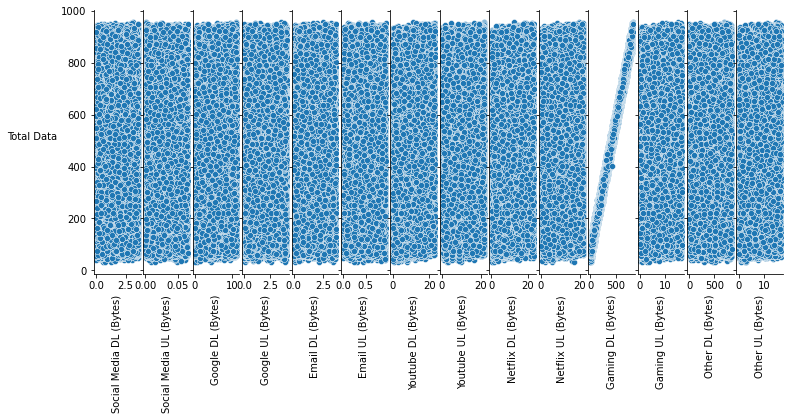

In [34]:
pp = sns.pairplot(data=n_df,x_vars=lst[2:16], y_vars=['Total Data'])

for ax in pp.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    #set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
pp.fig.set_size_inches(10,5)